# ML TUT Jan 25

# Pre-Processing in Pandas

## Basics

In [4]:

import pandas as pd
import numpy as np

In [5]:
# importing packages

# create data
df = pd.DataFrame([
                   [180000, 110, 18.9, 1400],
                   [360000, 905, 23.4, 1800],
                   [230000, 230, 14.0, 1300],
                   [60000, 450, 13.5, 1500]],

                   columns=['Col A', 'Col B',
                            'Col C', 'Col D'])

# view data
display(df)

,Col A,Col B,Col C,Col D
0,180000,110,18.9,1400
1,360000,905,23.4,1800
2,230000,230,14.0,1300
3,60000,450,13.5,1500


Min Max Scaling:

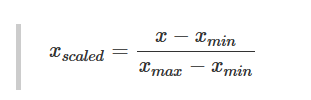

In [6]:
# copy the data
df_min_max_scaled = df.copy()

# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

# view normalized data
print(df_min_max_scaled)

      Col A     Col B     Col C  Col D
0  0.400000  0.000000  0.545455    0.2
1  1.000000  1.000000  1.000000    1.0
2  0.566667  0.150943  0.050505    0.0
3  0.000000  0.427673  0.000000    0.4


Standardization:

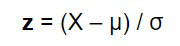

In [7]:
# copy the data
df_std_scaled = df.copy()

# apply normalization techniques
for column in df_std_scaled.columns:
    df_std_scaled[column] = (df_std_scaled[column] - df_std_scaled[column].mean()) / df_std_scaled[column].std()

# view normalized data
print(df_std_scaled)

      Col A     Col B     Col C    Col D
0 -0.221422 -0.895492  0.311486 -0.46291
1  1.227884  1.373564  1.278167  1.38873
2  0.181163 -0.552993 -0.741122 -0.92582
3 -1.187625  0.074922 -0.848531  0.00000


Dealing with Missing Values

In [8]:
# dictionary of lists
dict = {'First Score':[100, 90, np.nan, 95],
        'Second Score': [30, 45, 56, np.nan],
        'Third Score':[np.nan, 40, 80, 98]}

# creating a dataframe from list
df = pd.DataFrame(dict)
df

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,56.0,80.0
3,95.0,NaN,98.0


In [9]:
df.isnull()


,First Score,Second Score,Third Score
0,False,False,True
1,False,False,False
2,True,False,False
3,False,True,False


In [10]:
df.notnull()


,First Score,Second Score,Third Score
0,True,True,False
1,True,True,True
2,False,True,True
3,True,False,True


In [11]:
df.fillna(0)

,First Score,Second Score,Third Score
0,100.0,30.0,0.0
1,90.0,45.0,40.0
2,0.0,56.0,80.0
3,95.0,0.0,98.0


In [12]:
df.fillna(method ='pad')


/var/folders/3c/b623bbqx5f53n1_tf62yjhz40000gp/T/ipykernel_415/3763570036.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method ='pad')


,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,90.0,56.0,80.0
3,95.0,56.0,98.0


In [13]:
df.fillna(method ='bfill')


/var/folders/3c/b623bbqx5f53n1_tf62yjhz40000gp/T/ipykernel_415/4126801198.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method ='bfill')


,First Score,Second Score,Third Score
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,95.0,56.0,80.0
3,95.0,NaN,98.0


In [14]:
df.dropna()


,First Score,Second Score,Third Score
1,90.0,45.0,40.0


## Lec. Example

### Viz

In [15]:
csv_url = "https://raw.githubusercontent.com/ageron/data/refs/heads/main/housing/housing.csv"

In [16]:
housing = pd.read_csv(csv_url)

In [17]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [19]:
from matplotlib import pyplot as plt

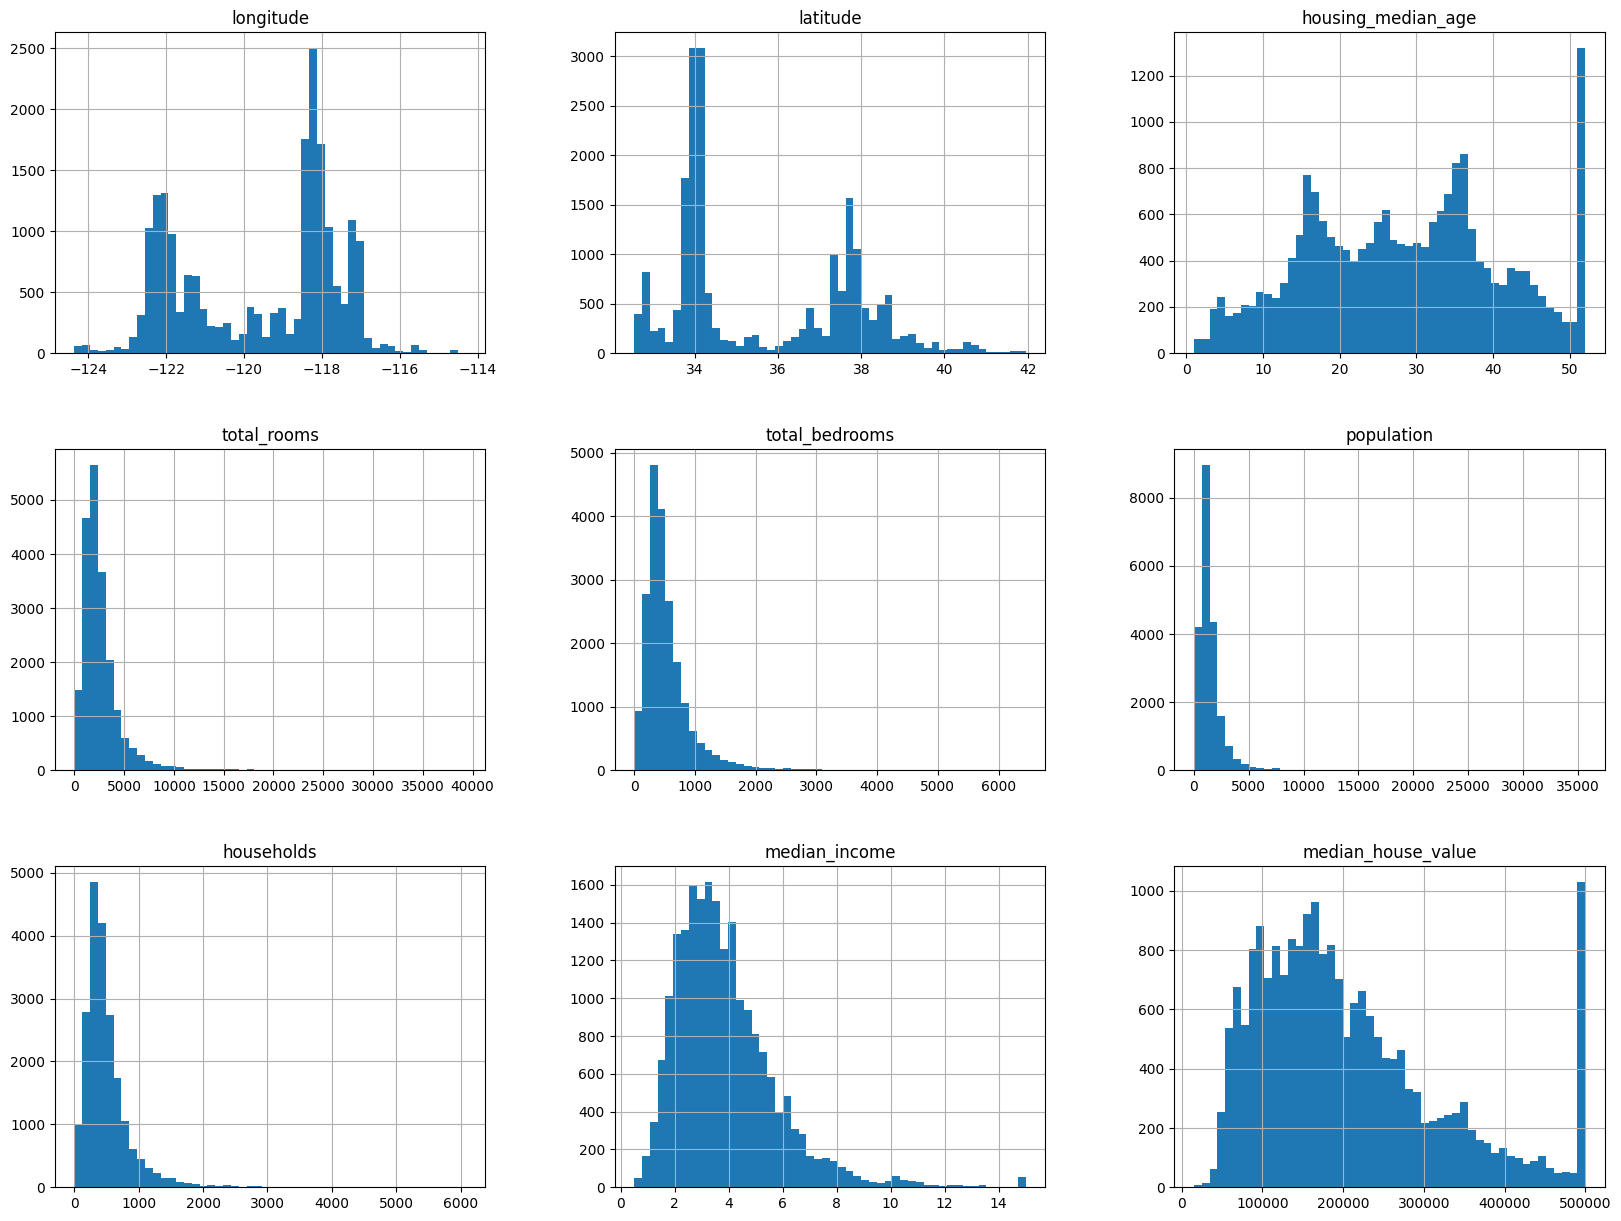

In [20]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

### splitting the data into test and training

In [21]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


train_set, test_set = shuffle_and_split_data(housing, 0.2)

In [22]:
len(train_set), len(test_set)

(16512, 4128)

In [23]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]



from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

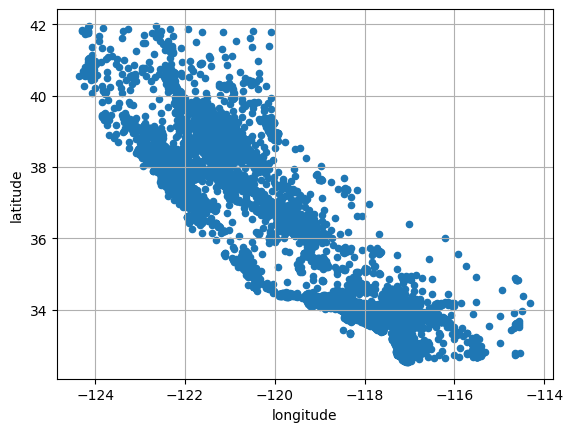

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude",grid=True)
plt.show()

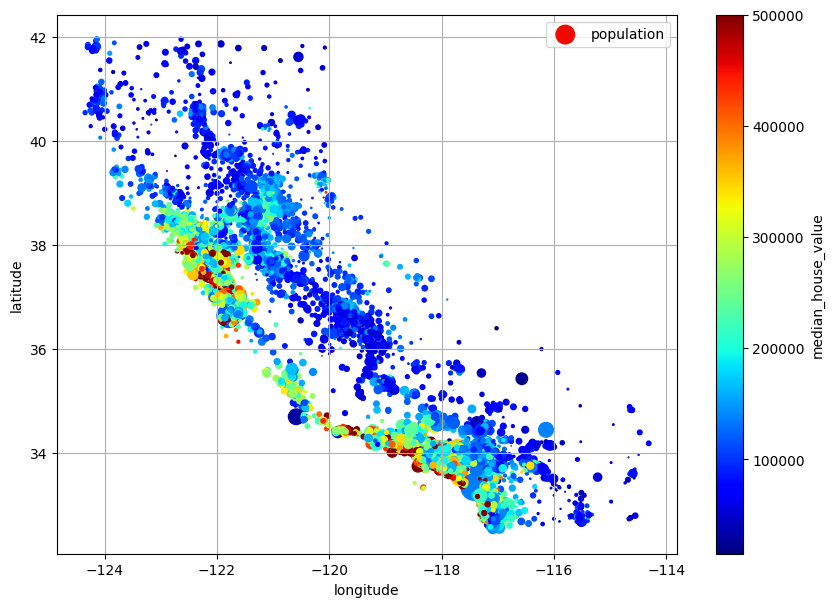

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", s=housing["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, grid=True, legend=True, sharex=False, figsize=(10,7))
plt.show()

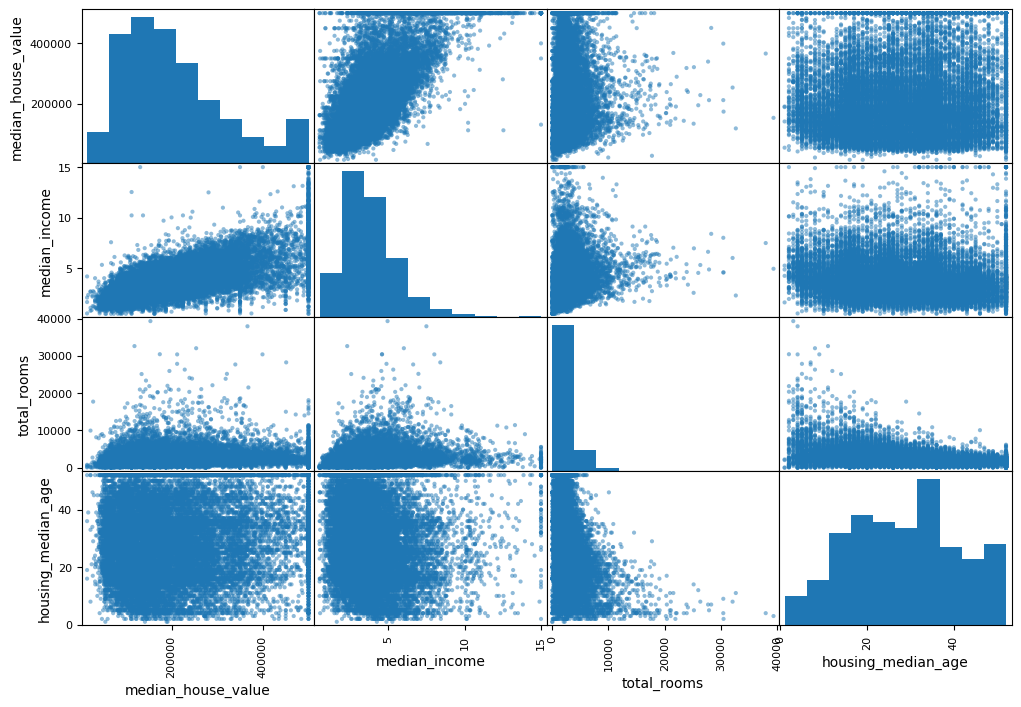

In [26]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

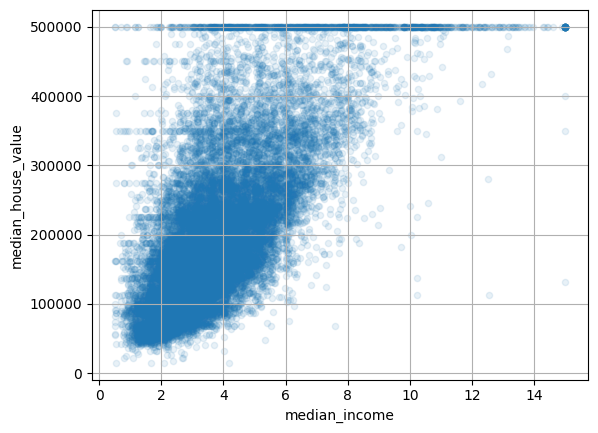

In [27]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()

### Data Cleaning

In [28]:
# housing.dropna(subset=["total_bedrooms"], inplace=True) # option 1

# housing.drop("total_bedrooms", axis=1) # option 2

median = housing["total_bedrooms"].median() # replacing the value to the number
housing["total_bedrooms"].fillna(median, inplace=True) # option 3



/var/folders/3c/b623bbqx5f53n1_tf62yjhz40000gp/T/ipykernel_415/1774870706.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True) # option 3


### Converting Text to Numbers

In [29]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [30]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

### overview
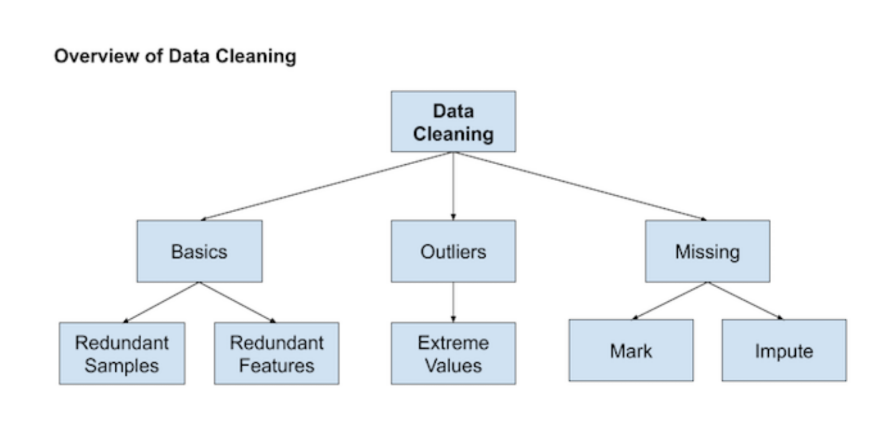

# Scikit Learn

## Regression Sample

In [31]:
# dictionary of lists
dict = {'First Score':["A", "B-", "A*", "B"],
        'Second Score': [30, 45, 56, np.nan],
        'Third Score':[np.nan, 40, 80, 98]}

# creating a dataframe from list
df = pd.DataFrame(dict)
df

,First Score,Second Score,Third Score
0,A,30.0,NaN
1,B-,45.0,40.0
2,A*,56.0,80.0
3,B,NaN,98.0


In [32]:
from sklearn.preprocessing import LabelEncoder

# label_encoder object knows
# how to understand word labels.
label_encoder = LabelEncoder()

# Encode labels in column 'species'.
df['First Score']= label_encoder.fit_transform(df['First Score'])

df['First Score'].unique()

array([0, 3, 1, 2])

In [33]:
df

,First Score,Second Score,Third Score
0,0,30.0,NaN
1,3,45.0,40.0
2,1,56.0,80.0
3,2,NaN,98.0


In [34]:
# dictionary of lists
dict = {'First Score':["A", "B-", "A*", "B"],
        'Second Score': [30, 45, 56, np.nan],
        'Third Score':[np.nan, 40, 80, 98]}

# creating a dataframe from list
df = pd.DataFrame(dict)
df

,First Score,Second Score,Third Score
0,A,30.0,NaN
1,B-,45.0,40.0
2,A*,56.0,80.0
3,B,NaN,98.0


In [35]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

enc_data = pd.DataFrame(enc.fit_transform(df[['First Score']]).toarray())

df['First Score'].unique()

array(['A', 'B-', 'A*', 'B'], dtype=object)

In [36]:
enc_data

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0


In [37]:
# import module
from sklearn.preprocessing import StandardScaler

# create data
data = [[11, 2], [3, 7], [0, 10], [11, 8]]

# compute required values
scaler = StandardScaler()
model = scaler.fit(data)
scaled_data = model.transform(data)

# print scaled data
print(scaled_data)

[[ 0.97596444 -1.61155897]
 [-0.66776515  0.08481889]
 [-1.28416374  1.10264561]
 [ 0.97596444  0.42409446]]


In [38]:
# import module
from sklearn.preprocessing import MinMaxScaler

# create data
data = [[11, 2], [3, 7], [0, 10], [11, 8]]

# scale features
scaler = MinMaxScaler()
model=scaler.fit(data)
scaled_data=model.transform(data)

# print scaled features
print(scaled_data)

[[1.         0.        ]
 [0.27272727 0.625     ]
 [0.         1.        ]
 [1.         0.75      ]]


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

ModuleNotFoundError: No module named 'seaborn'

In [40]:
# Loading the data
car_data = pd.read_csv('https://raw.githubusercontent.com/aijadugar/Car_Price_Prediction_End-to-End/refs/heads/main/car_data.csv')

In [41]:
car_data.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [42]:
car_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [43]:
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

/var/folders/3c/b623bbqx5f53n1_tf62yjhz40000gp/T/ipykernel_415/2468229643.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


In [44]:
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

/var/folders/3c/b623bbqx5f53n1_tf62yjhz40000gp/T/ipykernel_415/2804692890.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)


In [45]:
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

/var/folders/3c/b623bbqx5f53n1_tf62yjhz40000gp/T/ipykernel_415/3135549893.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)


In [46]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [47]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [48]:
corrMatrix = car_data.iloc[:,1:].corr()
sns.heatmap(corrMatrix, annot=True, cmap="viridis")
plt.show()

NameError: name 'sns' is not defined

In [49]:
car_data.shape

(301, 9)

In [50]:
X = car_data.drop(['Car_Name','Selling_Price'], axis=1)
Y = car_data['Selling_Price']

In [51]:
X.shape

(301, 7)

In [52]:
Y.shape

(301,)

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [54]:
X_train.shape

(240, 7)

In [55]:
X_test.shape

(61, 7)

In [56]:
lin_reg_model = LinearRegression()
#Now we can fit the model to our dataset
lin_reg_model.fit(X_train,Y_train)
training_data_prediction = lin_reg_model.predict(X_train)


NameError: name 'LinearRegression' is not defined

In [ ]:
train_error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error - Training : ", train_error_score)

R squared Error - Training :  0.883979349675079


In [ ]:
Y_pred = lin_reg_model.predict(X_test)
test_error_score = metrics.r2_score(Y_test, Y_pred)
print("R squared Error - Test: ", test_error_score)

R squared Error - Test:  0.8468053957655798


## Sample for Logistic Regression

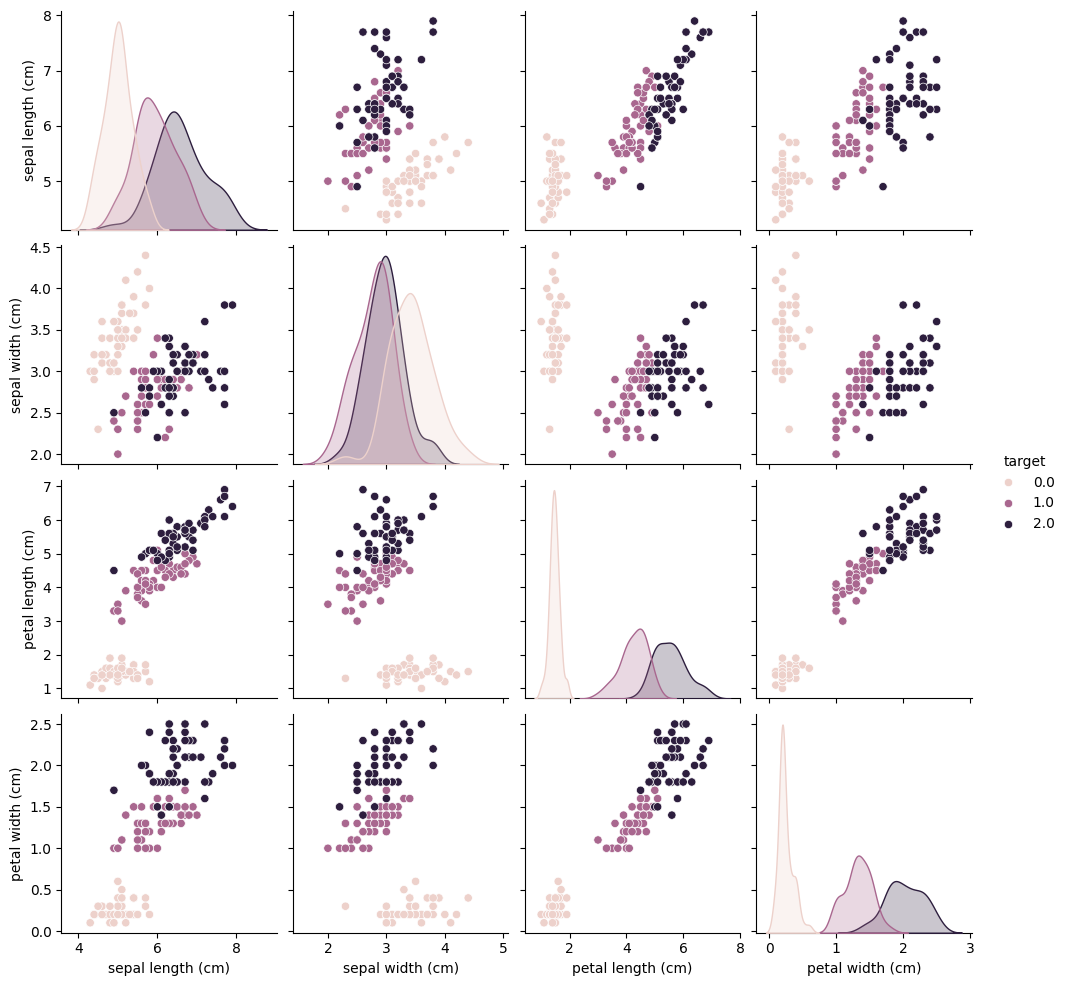

Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/Users/soumikdutta/PycharmProjects/pythonAIProject/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


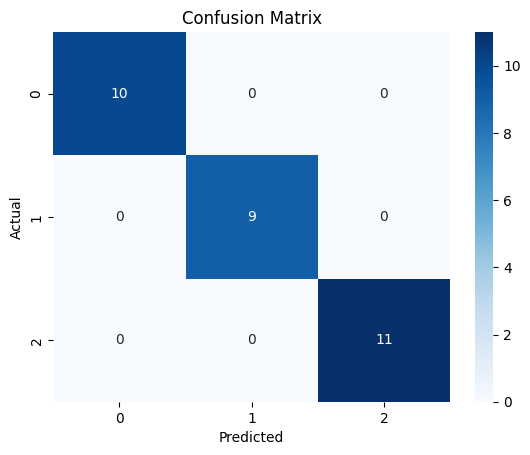

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
# For this example, let's use the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])


# EDA: Pairplot for visualization
sns.pairplot(df, hue='target', diag_kind='kde')
plt.show()

# Prepare the data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=10)  # Increase max_iter if needed
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Confusion Matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()